In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [779]:
class Room():

    def __init__(self, m, n):
        
        self.xmax = m
        self.ymax = n
        self.hx = 0.1
        self.hy = 0.1
        self.ht = 0.001
        self.xdim = int(self.xmax/self.hx)
        self.ydim = int(self.ymax/self.hy)
        self.mn = self.xdim*self.ydim
        self.room = np.empty(shape = (self.ydim,self.xdim))
        self.windows = None
        self.heaters = None
        self.walls = None
        self.alpha = 1
        self.Dx = (np.diag(np.ones(self.xdim - 1), -1) + np.diag(np.ones(self.xdim - 1), 1) + np.diag(-2*np.ones(self.xdim)))/(self.hx**2)
        self.Dy = (np.diag(np.ones(self.ydim - 1), -1) + np.diag(np.ones(self.ydim - 1), 1) + np.diag(-2*np.ones(self.ydim)))/(self.hy**2)
        self.Lapl = np.kron(np.identity(self.ydim), self.Dx) + np.kron(self.Dy, np.identity(self.xdim))
        self.Tout = 0
        self.H = 100

    def get_walls_ind(self):
        walls_temp = np.arange(room.mn)
        left_wall = walls_temp[walls_temp  % room.xdim == 0]
        right_wall = left_wall + room.xdim - 1
        upper_wall = walls_temp[0:room.xdim]
        lower_wall = walls_temp[-room.xdim:]
        self.walls = {'lw':left_wall, 'rw':right_wall, 'uw':upper_wall, 'low':lower_wall}   

    def init_ic(self):
        x = np.arange(-self.xmax/2, self.xmax/2, self.hx)
        y = np.arange(-self.ymax/2, self.ymax/2, self.hy)
        X, Y = np.meshgrid(x, y)
        #x0 = self.xmax / 2
        #y0 = self.ymax / 2
        self.room = 10*np.exp(-(X)**2 - (Y)**2)
        #self.room[:, :] = 293

    def plot_room(self):
        plt.imshow(self.room, extent=(0, self.xmax, 0, self.ymax), origin='lower', cmap='viridis')
        plt.colorbar(label="Temperature")
        plt.show()

    def solve(self):
        
        u = self.room.flatten()      
        Lu = np.matmul(self.Lapl, u)
        v = Lu*self.ht + u

        v[self.walls['lw']] = v[(self.walls['lw'])+1]
        v[self.walls['rw']] = v[(self.walls['rw'])-1]
        v[self.walls['uw']] = v[(self.walls['uw']) + self.xdim]
        v[self.walls['low']] = v[(self.walls['low']) - self.xdim]
        v[self.windows] = self.Tout
        v[self.heaters] = v[self.heaters] + self.ht*self.H*np.ones(len(self.heaters))
        
        self.room = v.reshape(self.ydim, self.xdim)

In [803]:
class Home():

    def __init__(self, T):

        self.rooms = []
        self.T = T
        self.home = None
        self.doors = None
        self.curr_t = 0
        self.cost_fun = None

    def load_rooms(self, size, n, xdim, ydim):
        for i in range(n):
            curr_size = size[i]
            room = Room(curr_size[0], curr_size[1])
            self.rooms.append(room)

In [805]:
home = Home(10)

In [807]:
sizes = [[3,4], [3, 4], [4, 4], [2, 10]]

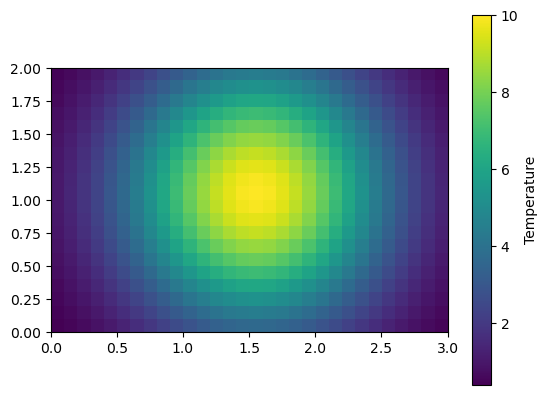

In [781]:
room = Room(m = 3, n = 2)
room.init_ic()
room.plot_room()

In [783]:
room.get_walls_ind()

In [785]:
w1 = np.arange(6,10)
w2 = np.arange(20, 24)

In [787]:
room.windows = np.append(w1, w2)

In [789]:
h1 = w1+room.xdim
h2 = w2+ room.xdim

In [791]:
room.heaters = np.append(h1, h2)

In [793]:
for i in range(1000):
    room.solve()

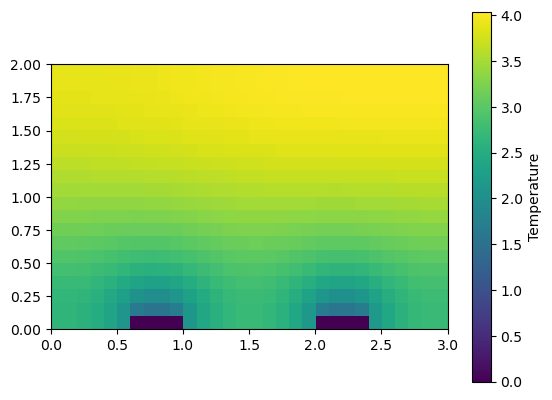

In [795]:
room.plot_room()